---
title: Palmer Penguins Classification
author: Sneha Narayanan
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
theme: "Lumen"

---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [60]:
import palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_curve, auc

In [61]:
penguins = load_penguins()

In [26]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [63]:
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [64]:
X = penguins.drop(columns=['species'])
y = penguins['species']

In [65]:
X_dummified = pd.get_dummies(X, drop_first=True)

In [66]:
X_dummified = pd.get_dummies(X, drop_first=True)

In [67]:
X_dummified.isnull().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
year                 0
island_Dream         0
island_Torgersen     0
sex_male             0
dtype: int64

In [68]:
X_dummified = X_dummified.dropna()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_dummified, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [81]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [84]:
y_encoded = y_encoded[X_dummified.index]

In [85]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_dummified, y_encoded)

KNeighborsClassifier(n_neighbors=3)

In [86]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_dummified, y_encoded)

KNeighborsClassifier()

In [87]:
tree3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree3.fit(X_dummified, y_encoded)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [88]:
tree_none = DecisionTreeClassifier(random_state=42)
tree_none.fit(X_dummified, y_encoded)

DecisionTreeClassifier(random_state=42)

In [89]:
y_pred_knn3 = knn3.predict(X_dummified)
y_pred_knn5 = knn5.predict(X_dummified)
y_pred_tree3 = tree3.predict(X_dummified)
y_pred_tree_none = tree_none.predict(X_dummified)

In [90]:
accuracy_knn3 = accuracy_score(y_encoded, y_pred_knn3)
accuracy_knn5 = accuracy_score(y_encoded, y_pred_knn5)
accuracy_tree3 = accuracy_score(y_encoded, y_pred_tree3)
accuracy_tree_none = accuracy_score(y_encoded, y_pred_tree_none)

In [91]:
print(f"Accuracy for kNN (k=3): {accuracy_knn3:.4f}")
print(f"Accuracy for kNN (k=5): {accuracy_knn5:.4f}")
print(f"Accuracy for Decision Tree (max_depth=3): {accuracy_tree3:.4f}")
print(f"Accuracy for Decision Tree (max_depth=None): {accuracy_tree_none:.4f}")

Accuracy for kNN (k=3): 0.9123
Accuracy for kNN (k=5): 0.8392
Accuracy for Decision Tree (max_depth=3): 0.9795
Accuracy for Decision Tree (max_depth=None): 1.0000


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [92]:
knn3.fit(X_train, y_train)
knn5.fit(X_train, y_train)
tree3.fit(X_train, y_train)
tree_none.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [93]:
y_pred_knn3 = knn3.predict(X_test)
y_pred_knn5 = knn5.predict(X_test)
y_pred_tree3 = tree3.predict(X_test)
y_pred_tree_none = tree_none.predict(X_test)

In [94]:
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

    print(f"Metrics for {model_name}:")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Precision (per species): {precision}")
    print(f"Recall (per species): {recall}")
    print(f"F1-score (per species): {f1}")
    print("\n")

    return precision, recall, f1

In [95]:
evaluate_model(y_test, y_pred_knn3, "kNN (k=3)")
evaluate_model(y_test, y_pred_knn5, "kNN (k=5)")
evaluate_model(y_test, y_pred_tree3, "Decision Tree (max_depth=3)")
evaluate_model(y_test, y_pred_tree_none, "Decision Tree (max_depth=None)")

Metrics for kNN (k=3):
Confusion Matrix:
[[26  3  1]
 [ 8  6  0]
 [ 3  0 22]]
Overall Accuracy: 0.7826
Precision (per species): [0.7027027  0.66666667 0.95652174]
Recall (per species): [0.86666667 0.42857143 0.88      ]
F1-score (per species): [0.7761194  0.52173913 0.91666667]


Metrics for kNN (k=5):
Confusion Matrix:
[[26  4  0]
 [12  2  0]
 [ 2  0 23]]
Overall Accuracy: 0.7391
Precision (per species): [0.65       0.33333333 1.        ]
Recall (per species): [0.86666667 0.14285714 0.92      ]
F1-score (per species): [0.74285714 0.2        0.95833333]


Metrics for Decision Tree (max_depth=3):
Confusion Matrix:
[[30  0  0]
 [ 1 13  0]
 [ 0  0 25]]
Overall Accuracy: 0.9855
Precision (per species): [0.96774194 1.         1.        ]
Recall (per species): [1.         0.92857143 1.        ]
F1-score (per species): [0.98360656 0.96296296 1.        ]


Metrics for Decision Tree (max_depth=None):
Confusion Matrix:
[[30  0  0]
 [ 0 14  0]
 [ 0  0 25]]
Overall Accuracy: 1.0000
Precision (per 

(array([1., 1., 1.]), array([1., 1., 1.]), array([1., 1., 1.]))

### The best model seems to be the Decision Tree (max_depth=3), as it has high accuracy and strong performance across all metrics (except for recall in the second class). It avoids the potential overfitting issue that the model with max_depth=None might have since that model achieved an accuracy of 1, which is often an indication of overfitting.

# Create one ROC plot for the species of your choice.

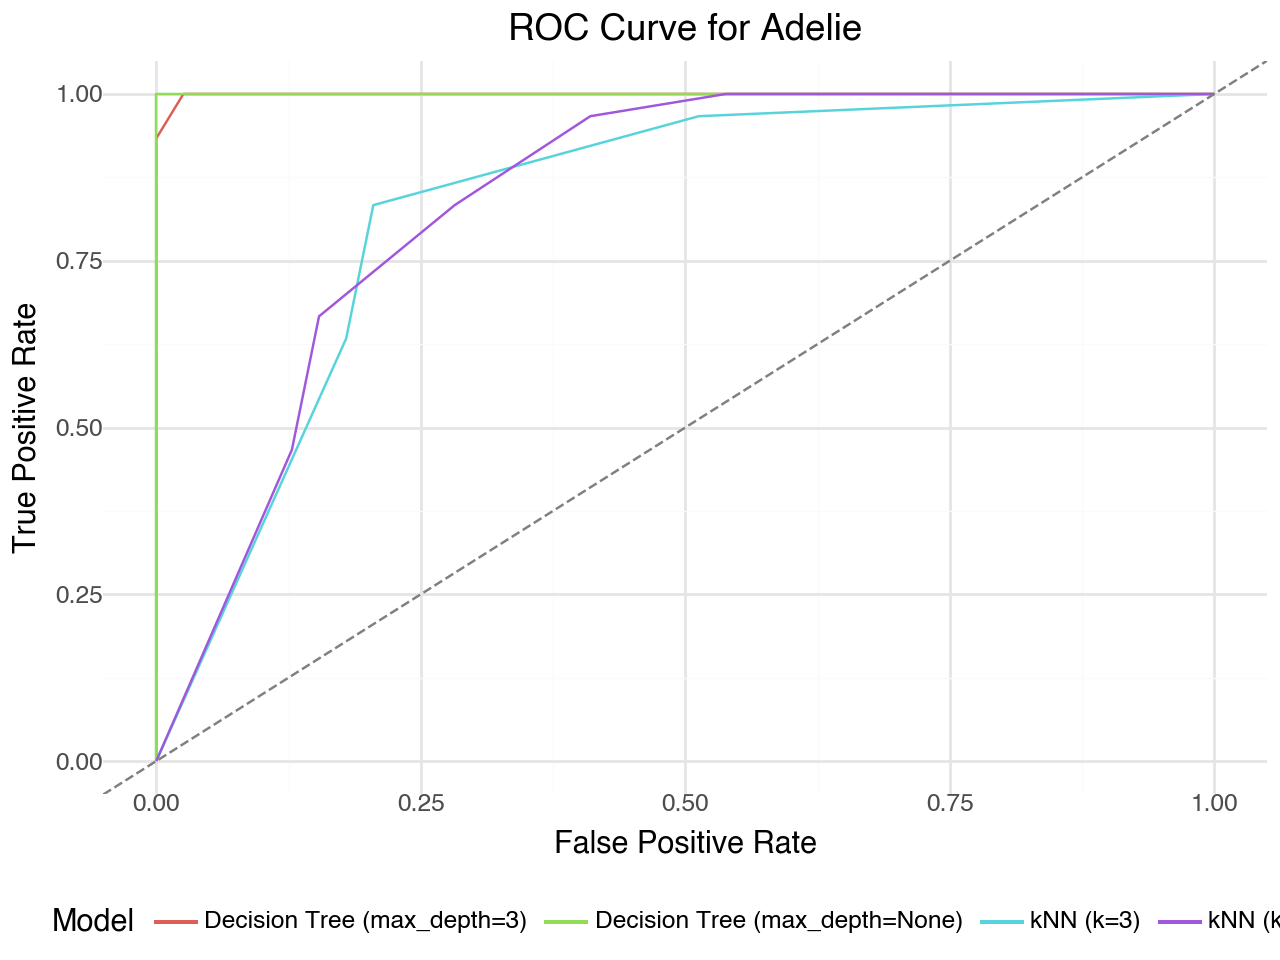

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd

species_index = 0

models = [
    ('kNN (k=3)', knn3.predict_proba(X_test)),
    ('kNN (k=5)', knn5.predict_proba(X_test)),
    ('Decision Tree (max_depth=3)', tree3.predict_proba(X_test)),
    ('Decision Tree (max_depth=None)', tree_none.predict_proba(X_test))
]

roc_data = pd.DataFrame()

for model_name, y_pred_prob in models:
    fpr, tpr, _ = roc_curve(y_encoded[:, species_index], y_pred_prob[:, species_index])
    roc_auc = auc(fpr, tpr)
    
    model_data = pd.DataFrame({
        'False Positive Rate': fpr,
        'True Positive Rate': tpr,
        'Model': model_name,
        'Species': lb.classes_[species_index]
    })
    roc_data = pd.concat([roc_data, model_data], ignore_index=True)

from plotnine import ggplot, aes, geom_line, geom_abline, theme_minimal, ggtitle, xlab, ylab, theme, labs

roc_plot = (
    ggplot(roc_data, aes(x='False Positive Rate', y='True Positive Rate', color='Model')) 
    + geom_line() 
    + geom_abline(linetype='--', color='gray') 
    + theme_minimal() 
    + ggtitle(f'ROC Curve for Adelie') 
    + xlab('False Positive Rate') 
    + ylab('True Positive Rate') 
    + theme(legend_position='bottom')
)

roc_plot.show()

The graph shows the ROC curve for different models predicting the Adelie species. The closer a curve is to the top-left corner, the better the model's performance in distinguishing between positive and negative classes.